<a href="https://colab.research.google.com/github/wjarvis2/DS-Sprint-01-Dealing-With-Data/blob/master/WillJarvisSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in data
df_with_autoheaders = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

# Validating # of instances
df_with_autoheaders.shape

# UCI says it has 306 instances while df.shape says 305
# df.head shows pandas has opted to take the first instance and treat it as labels.
# Treating the first instance as labels is the reason for the discrepancy

# Validating no missing values
df_with_autoheaders.isnull().sum()

# Adding names to columns by defining df with headers=none
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=0)

# Naming columns
df.columns = ['Age', 'Op_year', 'Nodes_detected', 'Survival']

# Remapping survival variable to traditional binary
survivaldict = {2: 0, 1:1}
df['Survival'] = df['Survival'].map(survivaldict)

# Printing first 5 rows
print (df.head(5))




   Age  Op_year  Nodes_detected  Survival
0   30       62               3         1
1   30       65               0         1
2   31       59               2         1
3   31       65               4         1
4   33       58              10         1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

                     Age   Op_year  Nodes_detected  Survival  Age_ranges  \
Age             1.000000  0.092623       -0.066548 -0.064351    0.963889   
Op_year         0.092623  1.000000       -0.003277  0.004076    0.093474   
Nodes_detected -0.066548 -0.003277        1.000000 -0.286191   -0.053598   
Survival       -0.064351  0.004076       -0.286191  1.000000   -0.081384   
Age_ranges      0.963889  0.093474       -0.053598 -0.081384    1.000000   
opyr_ranges     0.126407  0.966518       -0.007447  0.004877    0.120584   
node_ranges    -0.029602  0.005119        0.931517 -0.238162   -0.023185   
age_ranges      0.963889  0.093474       -0.053598 -0.081384    1.000000   

                opyr_ranges  node_ranges  age_ranges  
Age                0.126407    -0.029602    0.963889  
Op_year            0.966518     0.005119    0.093474  
Nodes_detected    -0.007447     0.931517   -0.053598  
Survival           0.004877    -0.238162   -0.081384  
Age_ranges         0.120584    -0.023185

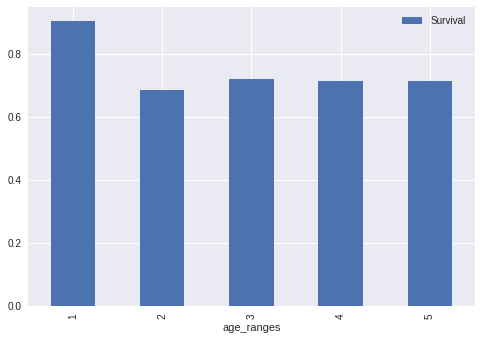

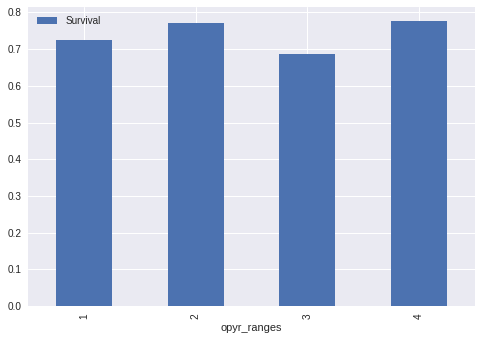

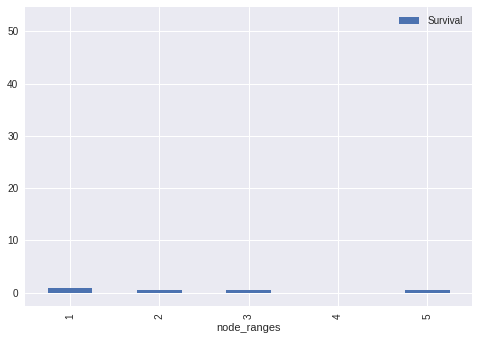

In [71]:
# Table 1: Correlation table of entire df
print (df.corr())
print ('\n')
print ('\n')
# Checking descriptive stats to appropriately apply values to bins
print ('Age Descriptive Stats:')
print (df['Age'].describe())
print ('\n')
print ('Nodes Detected Descriptive Stats:')
print (df['Nodes_detected'].describe())
print ('\n')
print ('Operation Year Descriptive Stats:')
print (df['Op_year'].describe())
print ('\n')
# Binning Age and Year of operation, and Nodes detected
age_criteria = [df['Age'].between(30,40), df['Age'].between(41,50), df['Age'].between(51,60), df['Age'].between(61,70), df['Age'].between(71,83)]
age_values = [1,2,3,4,5]

opyr_criteria = [df['Op_year'].between(58,60), df['Op_year'].between(61,63), df['Op_year'].between(64,66), df['Op_year'].between(67,69)]
opyr_values = [1, 2, 3, 4]

nodes_criteria = [df['Nodes_detected'].between(0,10), df['Nodes_detected'].between(11,20), df['Nodes_detected'].between(21,30), df['Nodes_detected'].between(31,40), df['Nodes_detected'].between(41,52)]
nodes_values = [1, 2, 3, 4, 5]

# Making a new column for bin criteria
df['age_ranges'] = np.select(age_criteria, age_values)
#print (df['age_ranges'])
# Table 2: Crosstab of df
print (pd.crosstab(df['Survival'],df['age_ranges'], normalize='columns' ))
print ('\n')
df['opyr_ranges'] = np.select(opyr_criteria, opyr_values)
print (pd.crosstab(df['Survival'],df['opyr_ranges'], normalize='columns' ))
print ('\n')
df['node_ranges'] = np.select(nodes_criteria, nodes_values)
print (pd.crosstab(df['Survival'],df['node_ranges'], normalize='columns' ))
print ('\n')


print (pd.pivot_table(df,values='Survival', index='age_ranges').plot.bar())

print (pd.pivot_table(df,values='Survival', index='opyr_ranges').plot.bar())

print (pd.pivot_table(df,values='Survival', index='node_ranges').plot.bar())




## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Correlation between survival and number of nodes detected: -0.28619050711851296
Correlation between survival and age: -0.06435101236634085
Correlation between survival and operation year: 0.004075846040974922
Correlation between nodes detected and operation year: -0.003277352558497927
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


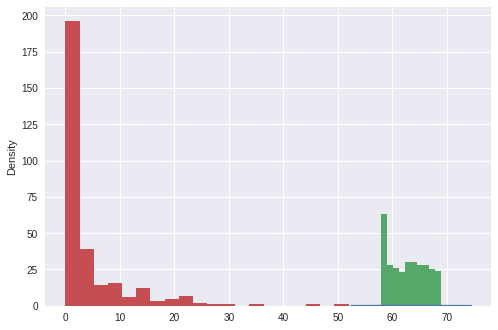

In [101]:
#plt.scatter(df['Age'], df['Nodes_detected'])
#plt.scatter(df['Nodes_detected'], df['Op_year'])
#plt.scatter(df['Age'], df['Op_year'])
#plt.show()


print ('Correlation between survival and number of nodes detected:', df['Survival'].corr(df['Nodes_detected']))
print ('Correlation between survival and age:', df['Survival'].corr(df['Age']))
print ('Correlation between survival and operation year:', df['Survival'].corr(df['Op_year']))
print ('Correlation between nodes detected and operation year:', df['Nodes_detected'].corr(df['Op_year']))

# One feature that has a positive relationship with survival, although slight, is the operation year.
# One feature that has a negative relationship with survival is the number of nodes detected.
# Number of nodes detected is slighlty correlated with a decrease in operation year. This make it appear
# less nodes are detected as time progresses, which may be true, but this could just be a factor of an 
# irregular dataset. 

print (df['Op_year'].plot.density())

# Upon further inspection, the distribution looks almost bimodal and depending on 

print (df['Op_year'].hist(bins=10))

# Looking at the histogram, it is clear that there were just many more cases
# toward the earlier years of the dataset, especiall in 1962. Because the volume
# was so irregularly high, this created a spurious correlation with operation year 
# and number of nodes. 

# Really, the 75 percentile for node count is only 4 nodes, but the max found in 
# the dataset is 52. A small number out outliers really distorted that whole feature.

print (df['Nodes_detected'].hist(bins=20))
# This histogram really drives the point home.